# <center>Data Visulization Improvement with Matplotlib</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
from IPython.display import Image

%config InlineBackend.figure_format = 'retina'

# Contents
* [Redesign 1: Ddot-line Plots](#Redesign-1:-Unemployment-Rates)
* [Redesign 2: Horizontal Bar Plots](#Redesign-2:-Global-GFP)
* [Redesign 3: Map with Gradient Colors](#Redesign-3:-Map-of-Family-Homlessness)

## Redesign 1: Unemployment Rates

### 1.1 Original Graph

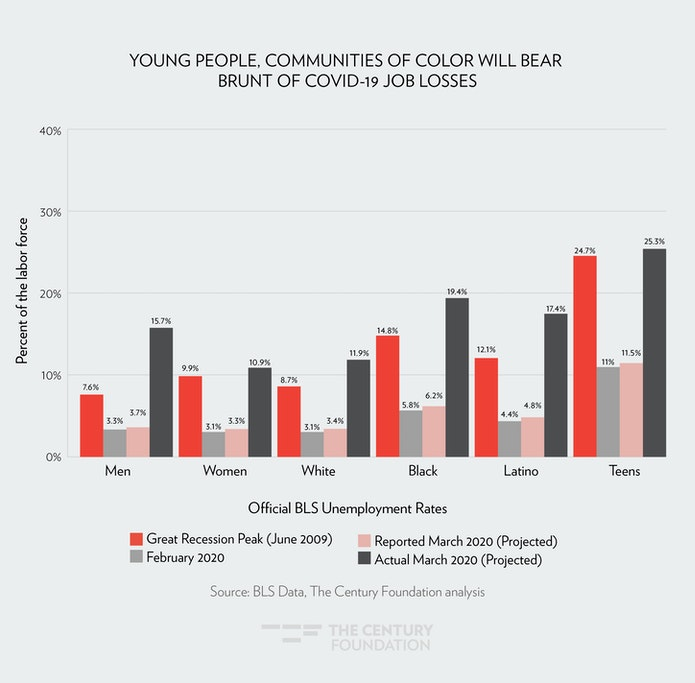

In [7]:
Image(filename = "data/Unemployment_Rates.jpeg", width = 600, height = 600)

Souce: https://tcf.org/content/commentary/new-data-show-true-march-jobless-rate-near-20-percent/?gclid=CjwKCAjwh7H7BRBBEiwAPXjads3MISB83jHccWXxRKmTGewLOTDCRpQ1he4hAXzFLsv4U618BbAtARoCs1wQAvD_BwE&agreed=1

### 1.2 Problems of Original Graph:

* Showing all groups in one graph will obscure results of contrasts. For example, the graph only make a conclusion that teenagers will bear the most job loss among all groups, but contrasting teenagers with differnet races or different sexes does not make sense. It would be better to show contrasts within different groups.
* Colors wre misused. The author uses red to represent data during Great Recession Peak, but uses black to represent data under the shock of COVID-19 which was supposed to gain more attention.
* It is hard to tell the differences between different groups with a grouped bar plot.
* It is hard to tell the differences between projected data actual data at the first glance.

### 1.3 Redesign Steps:

**Note:** This original plot was drawn in March, when the author didn't have the real data in March. As we redesign the graph, we've already got data for both March and April in 2020, which shows the actual shock of COVID-19. So we will only use unemplotment rate data in 3 periods: Great Recession Peak in 2009, March in 2020 and April in 2020.
* **Step 1**: Group similar variables into 3 groups. 
Group 1: Teenagers and Adults
Group 2: Men and Women
Group 3: White, Black or African American, Asian and Hispanic or Latino
* **Step 2**: Change it to a horizontal dot-line plot, which makes the contrast more clearly.
* **Step 3**: Change to a more reasonale color series. Use red to draw the most attention for data after COVID-19.

Data Source: https://www.bls.gov/cps/tables.htm#charunem

In [9]:
df1 = pd.read_csv("data/cpsaat20.csv")
df1 = df1.set_index("Month")
df1["20 years old and over"] = df1["Men, 20 years and over"] + df1["Women, 20 years and over"]

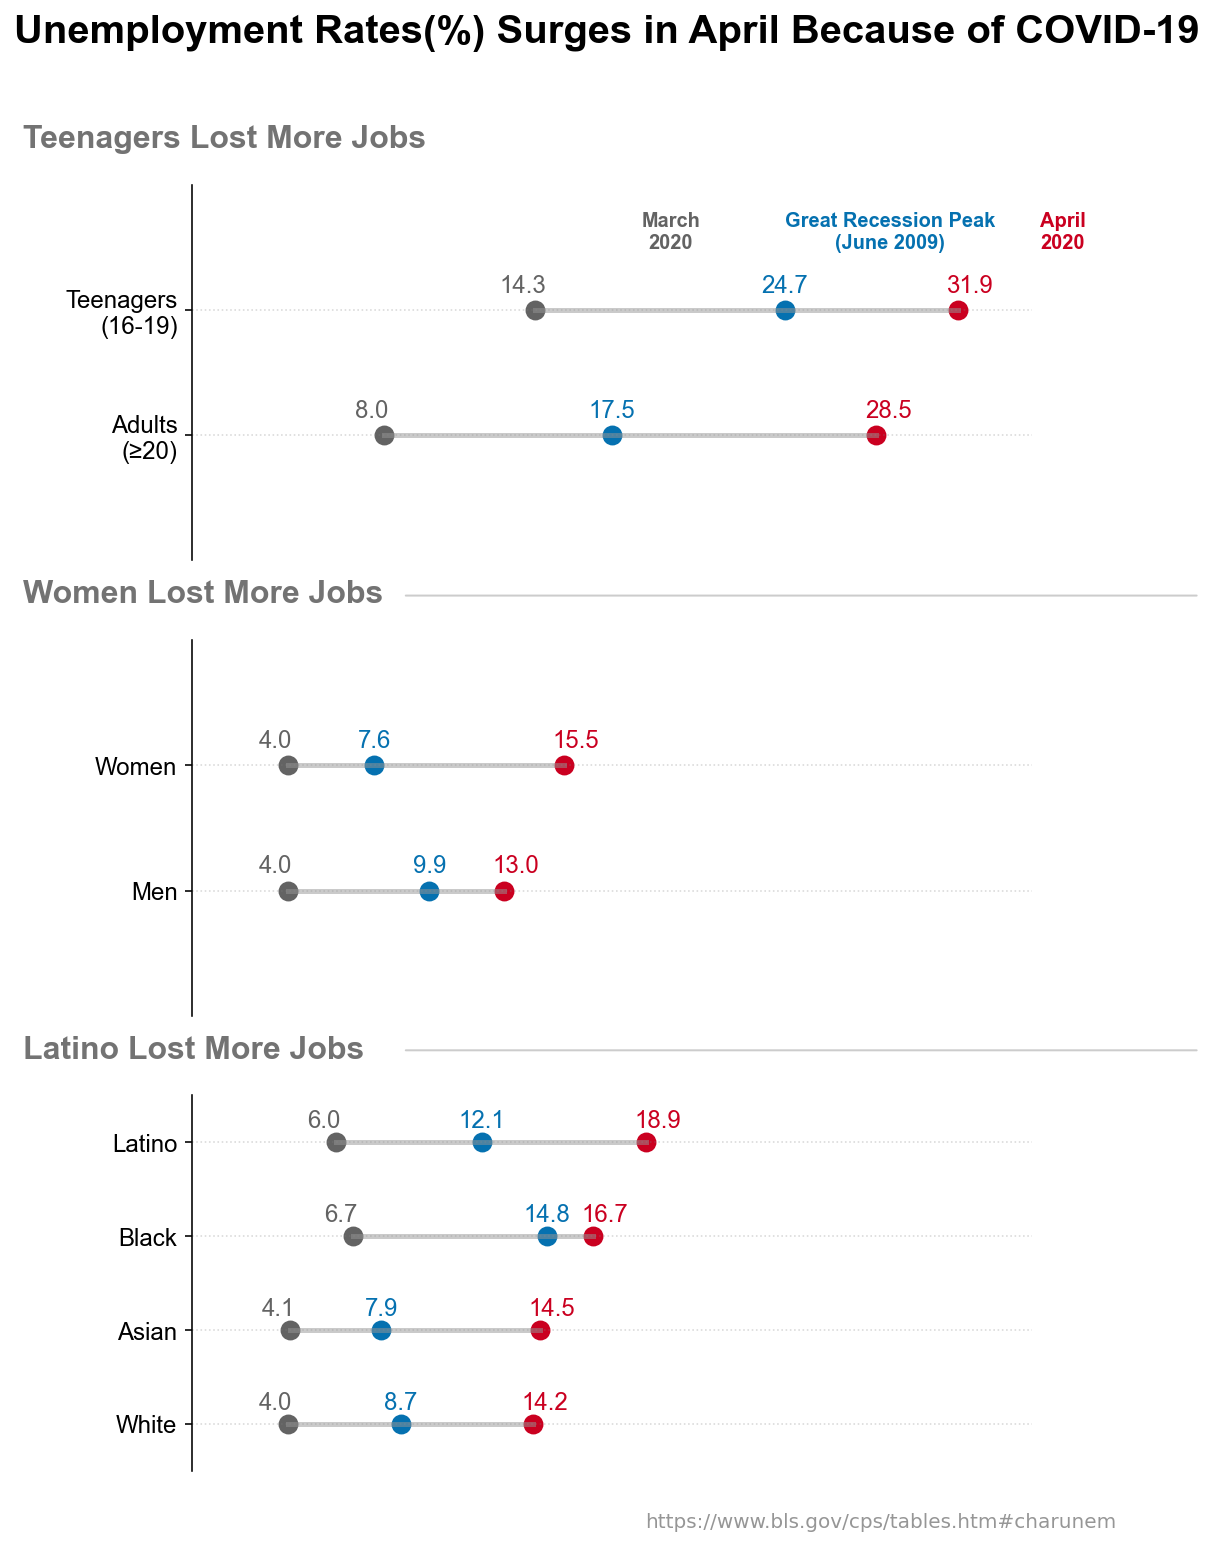

In [13]:
fig, axes = plt.subplots(3, 1, figsize = (8, 10))

color_09 = "#0571b0"
color_Mar = "#636363"
color_Apr = "#ca0020"
color_line = "#969696"
color_seperate = "#cccccc"
color_subtitle = "#737373"

def pair_format(ax):
    ax.set_xlim(0, 35)
    ax.grid(axis = "y", linestyle = ":", linewidth = 0.8, color = 'grey', alpha = 0.3)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

for ax in axes:
    pair_format(ax)


# --------------1st group, Different Ages in June 2009 and Feb 2020, March 2020
Ages = ["20 years old and over", "16 to 19 years old"]
Age_Jun09_x = list(df1.loc["9-Jun", Ages])
Age_Mar20_x = list(df1.loc["20-Mar", Ages])
Age_Apr20_x = list(df1.loc["20-Apr", Ages])
Age_y = [1, 2]

for i in range(2):
    axes[0].plot([Age_Mar20_x[i], Age_Apr20_x[i]], [Age_y[i]]*2, color = color_line, alpha = 0.5, linewidth = 2.5)
    axes[0].text(Age_Jun09_x[i], Age_y[i]+0.1, s = Age_Jun09_x[i], color = color_09, 
                     size = 12, fontname = "Arial", ha = "center", va = "bottom")
    axes[0].text(Age_Mar20_x[i]-0.5, Age_y[i]+0.1, s = Age_Mar20_x[i], color = color_Mar, 
                     size = 12, fontname = "Arial", ha = "center", va = "bottom")
    axes[0].text(Age_Apr20_x[i]+0.5, Age_y[i]+0.1, s = Age_Apr20_x[i], color = color_Apr, 
                     size = 12, fontname = "Arial", ha = "center", va = "bottom")

axes[0].scatter(Age_Jun09_x, Age_y, color = color_09, s = 80, marker = "o")
axes[0].scatter(Age_Mar20_x, Age_y, color = color_Mar, s = 80, marker = "o")
axes[0].scatter(Age_Apr20_x, Age_y, color = color_Apr, s = 80, marker = "o")

axes[0].set_ylim(0, 3)
axes[0].set_yticks(Age_y)
axes[0].set_yticklabels(["Adults\n(≥20)", "Teenagers\n(16-19)"], size = 12, fontname = "Arial")
axes[0].set_title("Teenagers Lost More Jobs", x = -0.2, y = 1.05, size = 16, fontname = "Arial", 
                      ha = "left", va = "bottom", weight = "bold", color = color_subtitle)

# --------------2nd group, Men and Women in June 2009 and Feb 2020, March 2020
Sex = ["Men, 20 years and over", "Women, 20 years and over"]
Sex_Jun09_x = list(df1.loc["9-Jun", Sex])
Sex_Mar20_x = list(df1.loc["20-Mar", Sex])
Sex_Apr20_x = list(df1.loc["20-Apr", Sex])
sex_y = [1, 2]

for i in range(2):
    axes[1].plot([Sex_Mar20_x[i], Sex_Apr20_x[i]], [sex_y[i]]*2, color = color_line, alpha = 0.5, linewidth = 2.5)
    axes[1].text(Sex_Jun09_x[i], sex_y[i]+0.1, s = Sex_Jun09_x[i], color = color_09, 
                     size = 12, fontname = "Arial", ha = "center", va = "bottom")
    axes[1].text(Sex_Mar20_x[i]-0.5, sex_y[i]+0.1, s = Sex_Mar20_x[i], color = color_Mar, 
                     size = 12, fontname = "Arial", ha = "center", va = "bottom")
    axes[1].text(Sex_Apr20_x[i]+0.5, sex_y[i]+0.1, s = Sex_Apr20_x[i], color = color_Apr, 
                     size = 12, fontname = "Arial", ha = "center", va = "bottom")

axes[1].scatter(Sex_Jun09_x, sex_y, color = color_09, s = 80, marker = "o")
axes[1].scatter(Sex_Mar20_x, sex_y, color = color_Mar, s = 80, marker = "o")
axes[1].scatter(Sex_Apr20_x, sex_y, color = color_Apr, s = 80, marker = "o")


axes[1].set_ylim(0, 3)
axes[1].set_yticks(sex_y)
axes[1].set_yticklabels(["Men", "Women"], size = 12, fontname = "Arial")
axes[1].set_title("Women Lost More Jobs", x = -0.2, y = 1.05, size = 16, fontname = "Arial", 
                      ha = "left", va = "bottom", weight = "bold", color = color_subtitle)


# --------------3rd group, Different Races in June 2009 and Feb 2020, March 2020
Races = ["White", "Asian", "Black or African American", "Hispanic or Latino"]
Races_short = ["White", "Asian", "Black", "Latino"]
Race_Jun09_x = list(df1.loc["9-Jun", Races])
Race_Mar20_x = list(df1.loc["20-Mar", Races])
Race_Apr20_x = list(df1.loc["20-Apr", Races])
race_y = [0.5, 1.5, 2.5, 3.5]

for i in range(4):
    axes[2].plot([Race_Mar20_x[i], Race_Apr20_x[i]], [race_y[i]]*2, color = color_line, alpha = 0.5, linewidth = 2.5)
    axes[2].text(Race_Jun09_x[i], race_y[i]+0.1, s = Race_Jun09_x[i], color = color_09, 
                     size = 12, fontname = "Arial", ha = "center", va = "bottom")
    axes[2].text(Race_Mar20_x[i]-0.5, race_y[i]+0.1, s = Race_Mar20_x[i], color = color_Mar, 
                     size = 12, fontname = "Arial", ha = "center", va = "bottom")
    axes[2].text(Race_Apr20_x[i]+0.5, race_y[i]+0.1, s = Race_Apr20_x[i], color = color_Apr, 
                     size = 12, fontname = "Arial", ha = "center", va = "bottom")

axes[2].scatter(Race_Jun09_x, race_y, color = color_09, s = 80, marker = "o", label = "Great Recession Peak")
axes[2].scatter(Race_Mar20_x, race_y, color = color_Mar, s = 80, marker = "o", label = "March 2020")
axes[2].scatter(Race_Apr20_x, race_y, color = color_Apr, s = 80, marker = "o", label = "April 2020")

axes[2].set_ylim(0, 4)
axes[2].set_yticks(race_y)
axes[2].set_yticklabels(Races_short, size = 12, fontname = "Arial")
axes[2].set_title("Latino Lost More Jobs", x = -0.2, y = 1.05, size = 16, fontname = "Arial", 
                      ha = "left", va = "bottom", weight = "bold", color = color_subtitle)


# Add title
plt.suptitle('Unemployment Rates(%) Surges in April Because of COVID-19', x = 0.02, y = 1.05, 
             ha = "left", va = "center", fontsize=20, fontname = "Arial", weight = "bold")

# Add legends
plt.gcf().text(0.59, 0.9, s = "March\n2020", color = color_Mar, 
               fontname = "Arial", ha = "center", weight = "bold")
plt.gcf().text(0.78, 0.9, s = "Great Recession Peak\n(June 2009)", fontname = "Arial", 
               color = color_09, ha = "center", weight = "bold")
plt.gcf().text(0.93, 0.9, s = "April\n2020", color = color_Apr, fontname = "Arial", 
               ha = "center", weight = "bold")

# Add seperating lines between graphs
plt.annotate("", xy = (1.2, 1.12), xytext=(0.25, 1.12), xycoords='axes fraction',
           arrowprops=dict(color=color_seperate,arrowstyle='-'))
plt.annotate("", xy = (1.2, 2.33), xytext=(0.25, 2.33), xycoords='axes fraction',
           arrowprops=dict(color=color_seperate,arrowstyle='-'))



#-----Add annotation for data source---

plt.annotate("https://www.bls.gov/cps/tables.htm#charunem", xy = (1, -0.2), xytext=(1.1, -0.15), 
             xycoords='axes fraction', ha = "right", color = color_line)

plt.tight_layout()
plt.show()

## Redesign 2: Global GFP

### 2.1 Original Graph

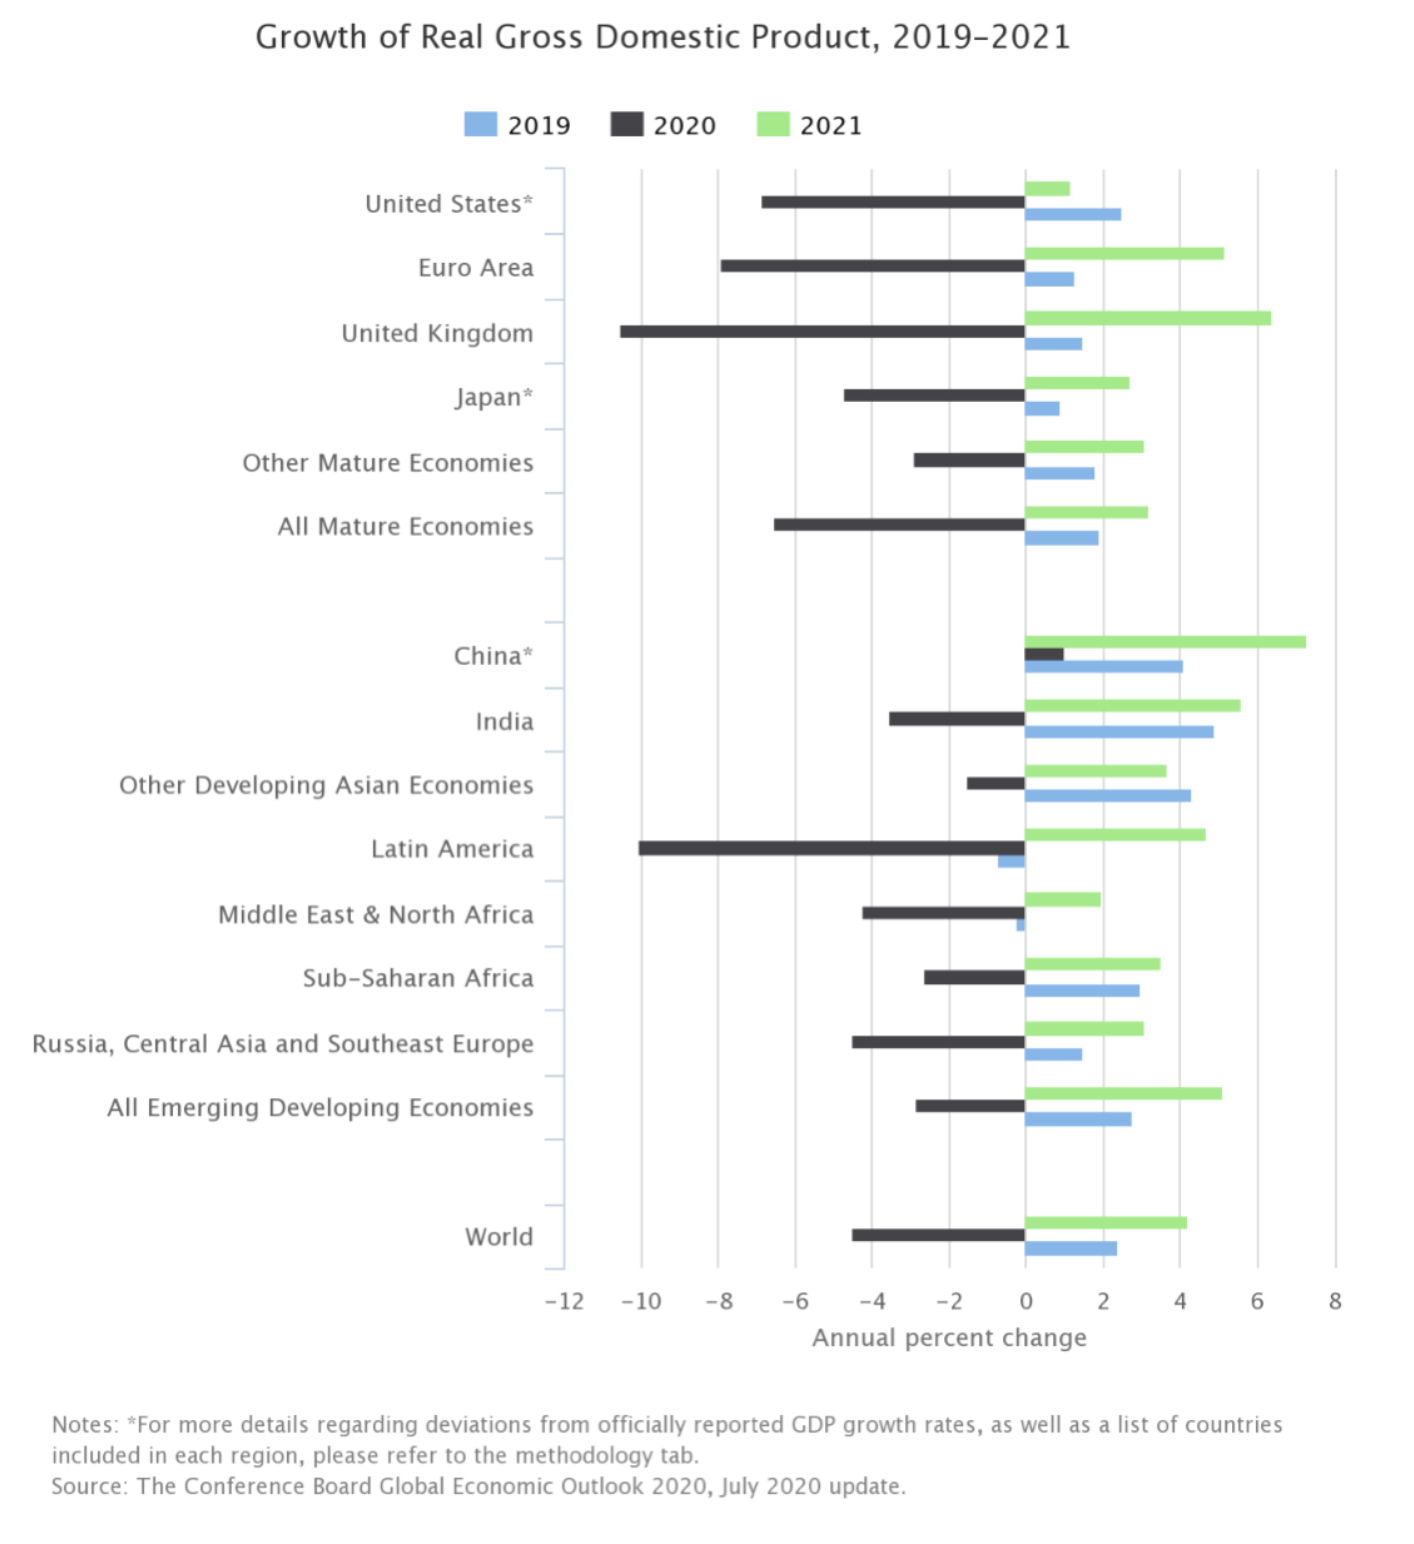

In [10]:
Image("data/chart.png", width = 600, height = 800)

Souce:  https://conference-board.org/data/globaloutlook/Global-Economy-Forecast-Projection

### 2.2 Problems of Original Graph:

* Multiple colors for different years is unnecessary.
* It is hard to tell which bars belongs to which counties.
* Using spaces to seperate different regions is unnecessary.
* Some country names are too long.

### 2.3 Redesign Steps:
* **Step 1**: Seperated years into three different subplots.<br>
* **Step 2**: Applied two soft colors to represent positive-nagative value of Annual Percent Change.<br>
* **Step 3**: Added line breaks for long region name, in order to leave more space for the visualization part.<br>
* **Step 4**: Used dark color and red squre to mark important findings in the chart. Conclusions are listed on the right. <br>
* **Step 5**: Data for the world's average was displayed as lines instead of bars in order to better compare the data.<br>
* **Step 6**: A more attractive title is shown above.

In [3]:
gdp = {'':["2019", "2020", "2021"] , 'United States':[2.5,-6.8,1.2],'Europe':[1.6,-7.8,5.3],'Euro Area':[1.3,-7.9,5.2],
        'United Kingdom':[1.5,-10.5,6.4],'Japan':[0.9,-4.7,2.7],'Other Mature Economies':[1.8,-2.8,2.9],
       'All Mature Economies':[1.9,-6.5,3.2],'China':[4.1,1.0,7.3],'India':[4.9,-3.5,5.6],'Other Developing Asian\nEconomies':[4.3,-1.5,3.7],
       'Latin America':[-0.7,-10,4.7],'Brazil':[1.1,-7.9,4.5],'Mexico':[-0.3,-10.7,5.7],'Middle East & North Africa':[-0.2,-4.2,2.0],
       'Gulf region':[0.6,-5.8,2.3],'Sub-Saharan Africa':[3.0,-2.6,3.5],'Russia, Central Asia,\nand Southeast Europe':[1.5,-4.4,3.1],
       'Russia':[1.3,-5.2,3.6],'Turkey':[0.9,-5.0,3.6],'All Emerging Markets and\nDeveloping Economies':[2.8,-2.8,5.1]
       }
df_gdp = pd.DataFrame(gdp).set_index("").T.reset_index()
df_gdp = df_gdp.rename(columns = {"index":"Countries"})

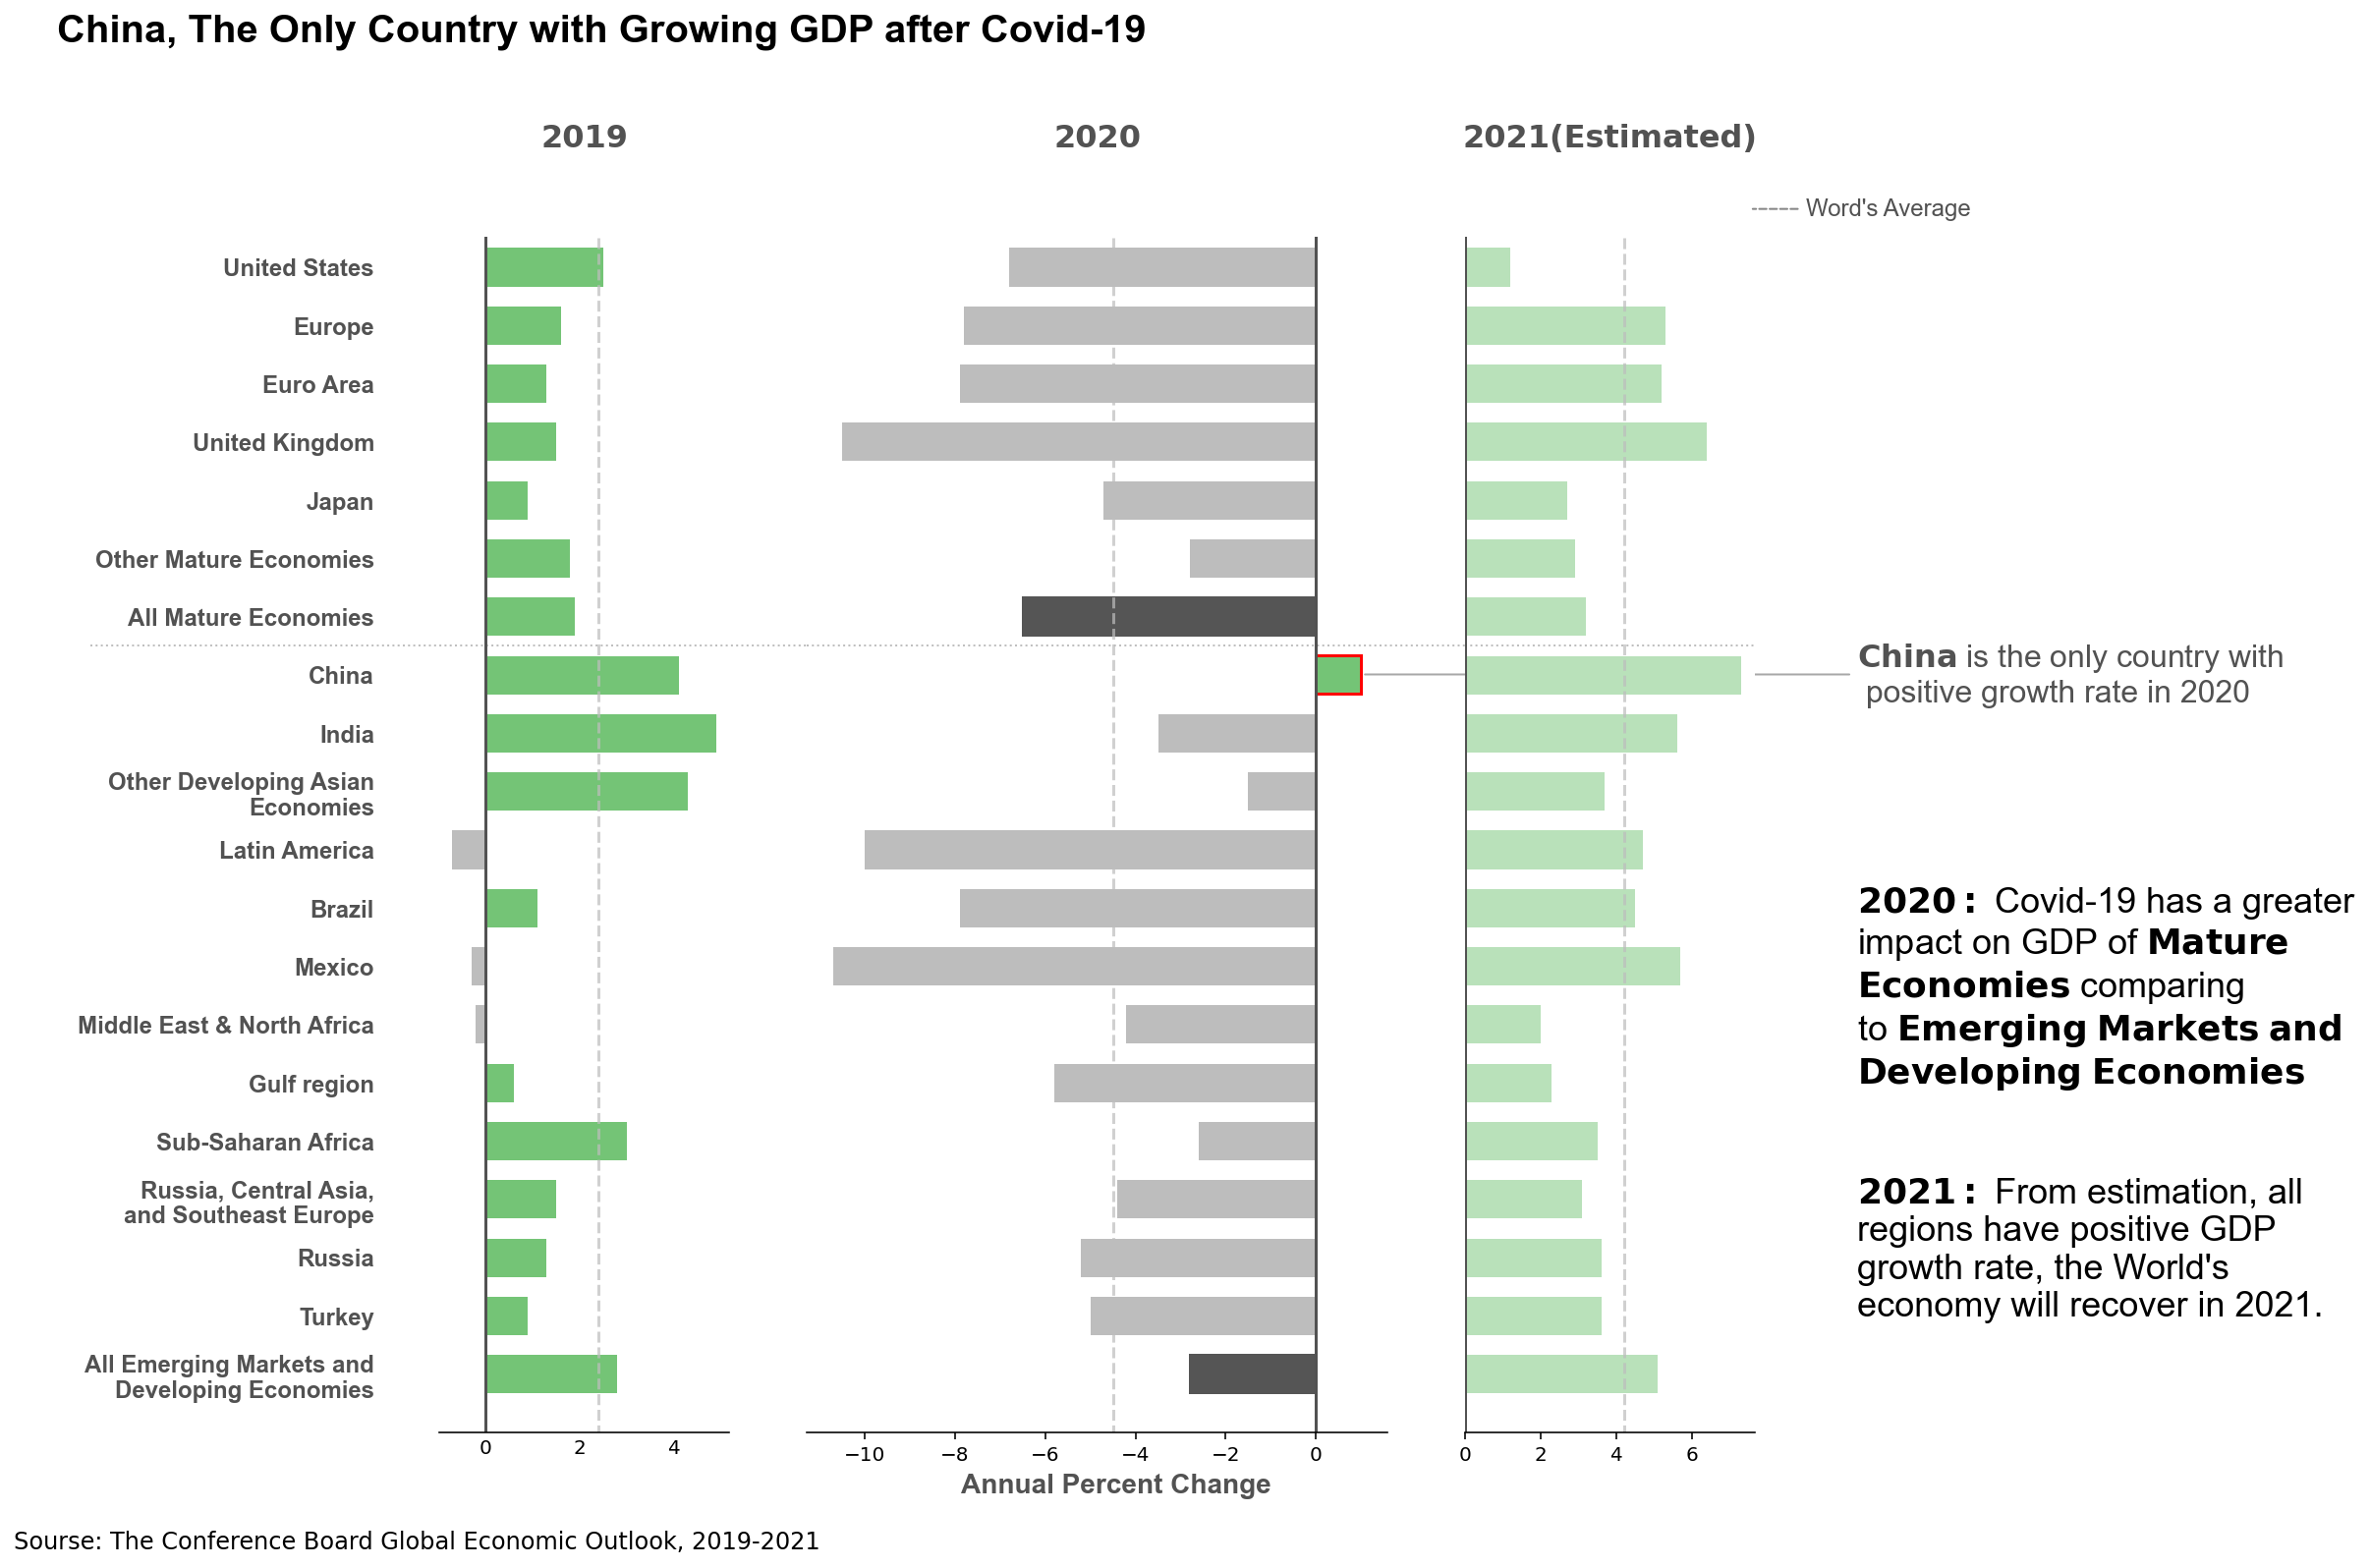

In [5]:
fig, axes = plt.subplots(1, 3, figsize = (12, 12), gridspec_kw={'width_ratios': [1, 2, 1]})

negative_grey = "#bdbdbd"
positive_green = "#74c476"
font_grey = "#525252"
border_china = "#fdae61"

years = ["2019", "2020", "2021"]

for i in range(3):
    colors = []
    for value in df_gdp[years[i]]:
        if value < 0:
            colors.append(negative_grey)
        else:
            colors.append(positive_green)
    bar = axes[i].barh(df_gdp["Countries"], df_gdp[years[i]], height = 0.66,
                 color = colors, alpha = 0.5 if i == 2 else 1)
    if i == 1:
        bar[6].set_color('#555555')
        bar[19].set_color('#555555')
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["left"].set_visible(False)
    axes[i].set_ylim(-2, 20)
    axes[i].invert_yaxis()
    if i == 0:
        axes[i].set_yticks(df_gdp["Countries"])
        axes[i].tick_params(size = 0)
        axes[i].set_yticklabels(df_gdp["Countries"], x = -0.2, ha = "right", weight = "bold",
                               size = 12, fontname = "Arial", color = font_grey)
    else:
        axes[i].set_yticks([])
        axes[i].set_yticklabels([])
    
    axes[i].plot([0, 0], [-0.5, 20], color = font_grey)
    axes[i].set_title(years[i] if i < 2 else years[i] + "(Estimated)", 
                      x = 0.5, y = 1, ha = "center", va = "center",
                      size = 16, color = font_grey, weight = "bold")
    

axes[0].axhline(y=6.5,xmin=-1.2,xmax=1.5,c="grey",linestyle = ":",alpha = 0.5 ,linewidth=1,zorder=0, clip_on=False)
axes[1].axhline(y=6.5,xmin=0,xmax=1.5,c="grey",linestyle = ":",alpha = 0.5 ,linewidth=1,zorder=0, clip_on=False)
axes[2].axhline(y=6.5,xmin=0,xmax=1,c="grey",linestyle = ":",alpha = 0.5 ,linewidth=1,zorder=0, clip_on=False)

# line(world)
axes[0].plot([2.4] * 2, [-0.5, 20], color=negative_grey,alpha = 0.7,zorder=1.5, linestyle= '--')
axes[1].plot([-4.5] * 2, [-0.5, 20], color=negative_grey,alpha = 0.7,zorder=1.5, linestyle= '--')
axes[2].plot([4.2]*2, [-0.5, 20], color=negative_grey,alpha = 0.7,zorder=1.5,linestyle= '--')

# legend of world's average
axes[2].annotate("Word's Average",
            xy=(7.5, -1), xytext=(9, -1),ha='left',va = 'center', 
            arrowprops=dict(arrowstyle='-',color = font_grey,linestyle = "--", alpha = 0.7),
             fontsize = 12, color = font_grey, fontname = "Arial")

# Add annotations for China
rect = patches.Rectangle((0,6.66),1,0.66,linewidth=1.5,edgecolor='red',facecolor='none',zorder=2)
axes[1].add_patch(rect)

axes[1].annotate(r"$\bf{China}$"+' is the only country with\n positive growth rate in 2020',
            xy=(1, 6.99), xytext=(12, 6.99),ha='left',va = 'center', 
            arrowprops=dict(arrowstyle='-',color = font_grey,alpha = 0.5),
             fontsize = 16, color = font_grey, fontname = "Arial")

axes[1].text(12,14, r"$\bf{2020:}$"+' Covid-19 has a greater\nimpact on GDP of '+r"$\bf{Mature}$"+'\n'+ r"$\bf{Economies}$"+
         ' comparing\nto ' + r"$\bf{Emerging}$"+' '
         +r"$\bf{Markets}$"+' '+r"$\bf{and}$"+'\n'
         +r"$\bf{Developing}$"+ ' ' +r"$\bf{Economies}$",
         {'color': 'black', 'fontsize': 18,'fontname':'Arial'},horizontalalignment='left')

axes[1].text(12,18, r"$\bf{2021:}$"+' From estimation, all\nregions have positive GDP\ngrowth rate, the World\'s\neconomy will recover in 2021.',
         {'color': 'black', 'fontsize': 18,'fontname':'Arial'}, ha='left')

# title and axis label
plt.suptitle('China, The Only Country with Growing GDP after Covid-19', x = -0.1, y = 0.95, 
             ha = "left", va = "center", fontsize=20, fontname = "Arial", weight = "bold")
plt.xlabel('Annual Percent Change',x = -1.2, y = 21.5, ha = "center", va = "top",
           fontsize = 14, fontname = "Arial", color = font_grey, weight = "bold")
axes[0].text(-10, 22, 'Sourse: The Conference Board Global Economic Outlook, 2019-2021', 
         {'color': 'black', 'fontsize': 12})
plt.show()

## Redesign 3: Map of Family Homlessness

### 3.1 Original Graph

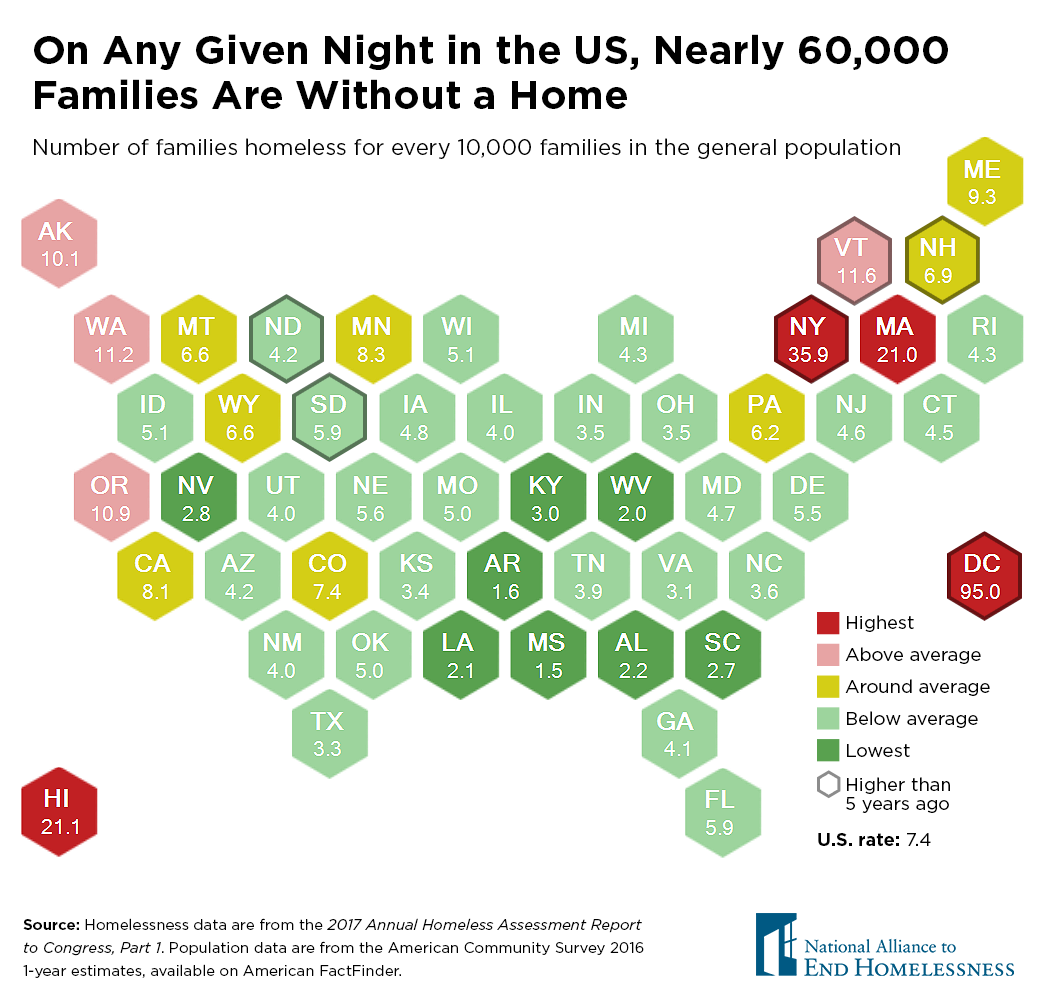

In [6]:
Image(filename = "data/family-homelessness-map-v4.png", width = 600, height = 600)

Souce: https://endhomelessness.org/resource/family-homelessness-in-the-united-states-state-by-state-snapshot/

### 3.2 Problems of Original Graph:

* Polygons are in the same size to represent each state, which can't show geographic information accurately.
* Showing abbrevations and data of each state on each polygon can make infomation cluttering
* The legend only shows several levels, but didn't show the exact boundaries of each level
* DC is particularly higher than other states, which should be treated as an outlier, instead of being placed in the the same level with above 20 group.

### 3.3 Redesign Steps:
* **Step 1**:Change it to a real map
* **Step 2**:Change diverse colors to a gradient series
* **Step 3**:Change the legend to a colorbar with clear boundaries and make it more readable
* **Step 4**:As DC is a very small region which cannot be shown clearly in the graph, we will use annotations to illustrate its specialty.

In [7]:
Homless_Numbers = {'Alaska': [10.1], 'Maine': [9.3], 'Vermont': [11.6], 'New Hampshire': [6.9], 'Washington': [11.2],
                   'Montana': [6.6], 'North Dakota': [4.2], 'Minnesota': [8.3], 'Wisconsin': [5.1], 'Michigan': [4.3],
                   'New York': [35.9], 'Massachusetts': [21.0], 'Rhode Island': [4.3], 'Idaho': [5.1], 'Wyoming': [6.6],
                   'South Dakota': [5.9], 'Iowa': [4.8], 'Illinois': [4.0], 'Indiana': [3.5], 'Ohio': [3.5],
                   'Pennsylvania': [6.2], 'New Jersey': [4.6], 'Connecticut': [4.5], 'Oregon': [10.9], 'Nevada': [2.8],
                   'Utah': [4.0], 'Nebraska': [5.6], 'Missouri': [5.0], 'Kentucky': [3.0], 'West Virginia': [2.0],    
                   'Maryland': [4.7], 'Delaware': [5.5], 'California': [8.1], 'Arizona': [4.2], 'Colorado': [7.4],
                   'Kansas': [3.4], 'Arkansas': [1.6], 'Tennessee': [3.9], 'Virginia': [3.1], 'North Carolina': [3.6],
                   'New Mexico': [4.0], 'Oklahoma': [5.0], 'Louisiana': [2.1], 'Mississippi': [1.5], 'Alabama': [2.2], 
                   'South Carolina': [2.7], 'Texas': [3.3], 'Georgia': [4.1], 'Hawaii': [21.1], 'Florida': [5.9],
                   'District of Columbia': [95.0] }
# Transfer data to dataframe
df_homeless = pd.DataFrame(Homless_Numbers).T
df_homeless.columns = ["Number"]
higher = ["North Dakota", "Vermont", "New Hampshire", "New York", "South Dakota", "District of Columnbia"]
# Cut number of families homeless into 5 sections
boundaries  = [0, 3, 6, 10, 20, 100]
bounds = [i for i in range(1, 7)]
colors = ["#d0d1e6", "#a6bddb", "#74a9cf", "#3690c0", "#045a8d"]
df_homeless["section"] = pd.cut(df_homeless["Number"], boundaries)
df_homeless["color"] = pd.cut(df_homeless["Number"], boundaries, labels = colors)
df_homeless.head(2)

,Number,section,color
Alaska,10.1,"(10, 20]",#3690c0
Maine,9.3,"(6, 10]",#74a9cf


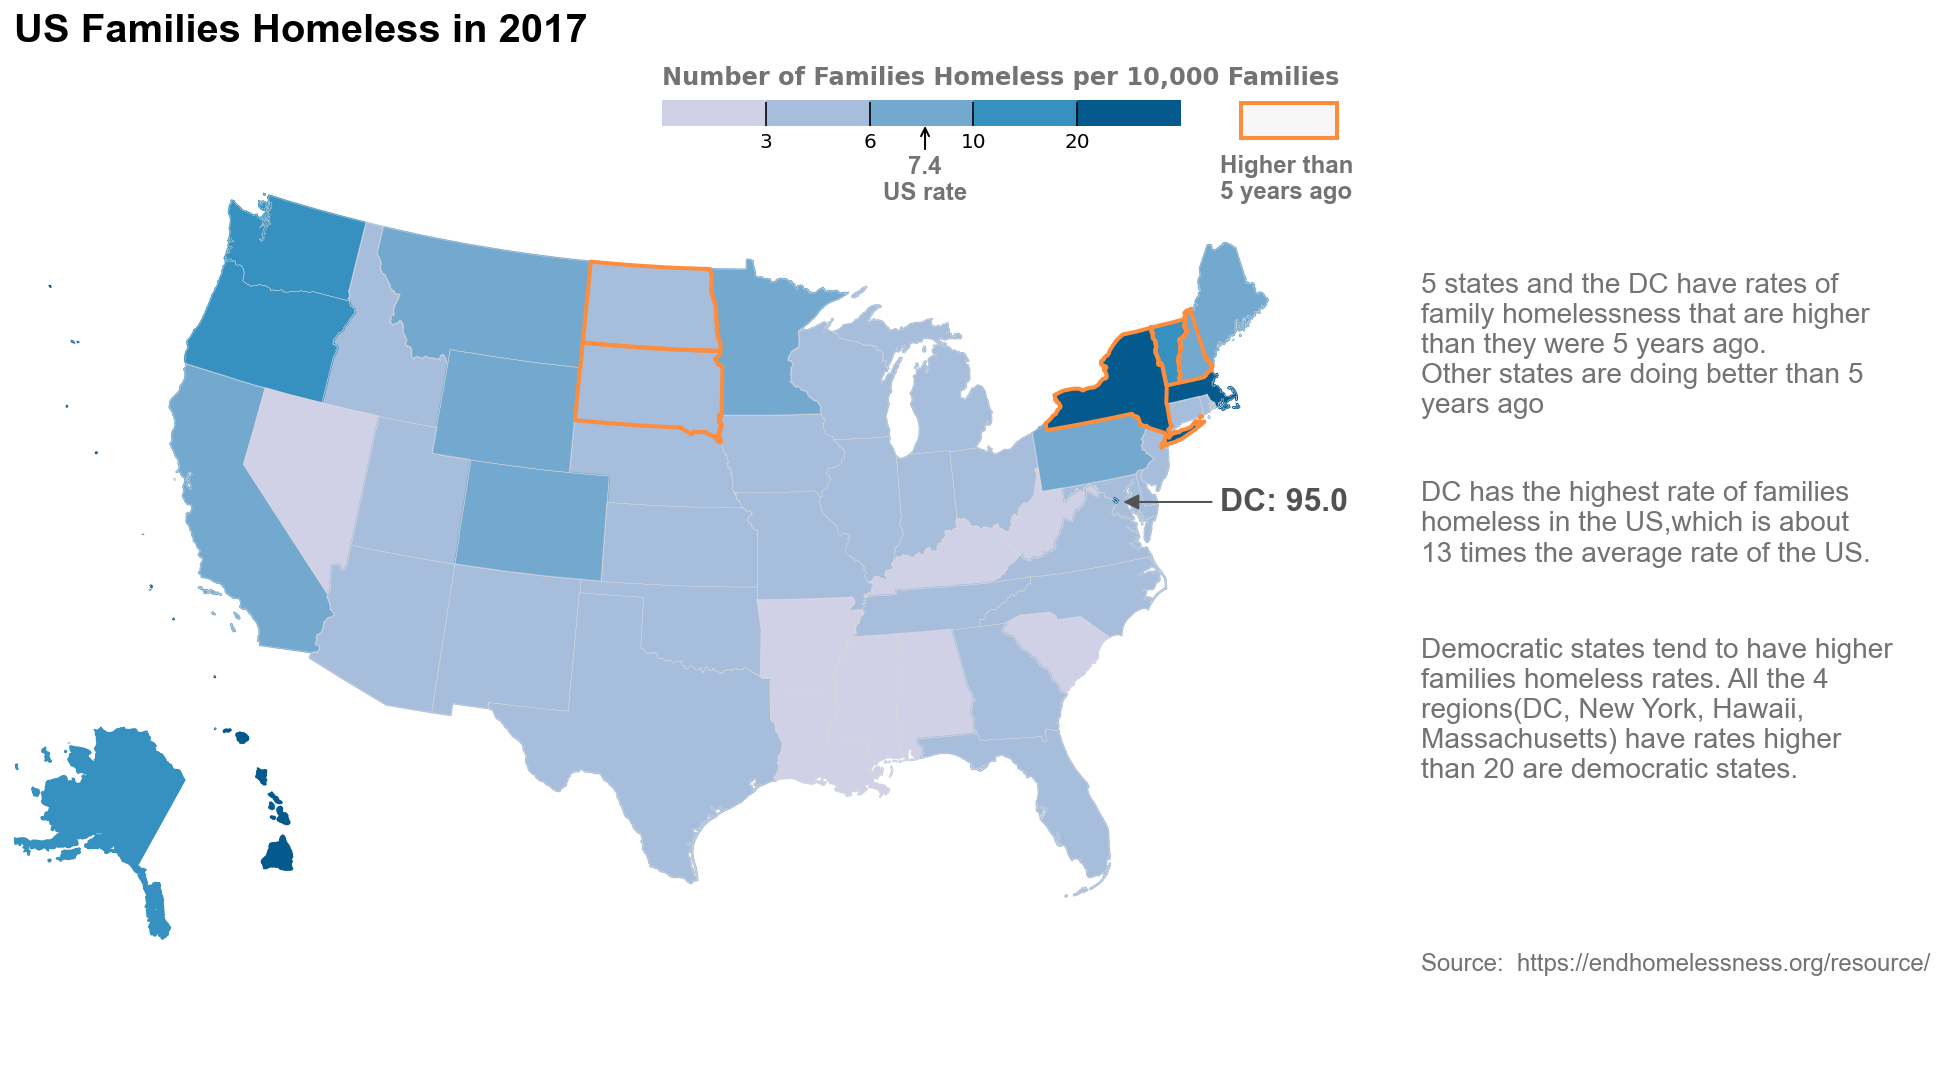

In [8]:
fig, ax = plt.subplots(figsize = (12, 12))

font_grey = "#737373"
border_grey = "#d9d9d9"
border_higher = "#fd8d3c"
annotations_grey = "#525252"
m = Basemap(llcrnrlon=-122,llcrnrlat=15,urcrnrlon=-57,urcrnrlat=53,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
shape = m.readshapefile('data/st99_d00', name='states', drawbounds=True,
                        linewidth = 0.2, color = border_grey)

# choose a color for each state based on it's homeless number.
states = [shapedict["NAME"] for shapedict in m.states_info]

for i, seg in enumerate(m.states):
    state = states[i]
    if state != 'Puerto Rico':
        if state == 'Alaska':
        # Alaska is too big. Scale it down to 35% first, then place it on the lower left corner of the picture. 
            seg = [(0.35*x + 350000, 0.35*y - 1000000) for x, y  in seg]
        # Show Hawaii on graph beside Alaska
        if state == 'Hawaii':
            seg = [(x + 4200000, y-1300000) for x, y in seg]

        color = df_homeless.loc[state, "color"]
        poly = Polygon(seg, facecolor = color, edgecolor = color)
        ax.add_patch(poly)
        # draw different boundaries for states whose data are higher than 5 years ago
        if state in higher:
            x, y = zip(*seg)
            m.plot(x, y, marker = None, color = border_higher, linewidth = 2)
        
        
# Set borders and title
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_title("US Families Homeless in 2017", x = 0, y = 0.98, 
             ha = "left", size = 20, fontname = "Arial", weight = "bold")


# Set colorbar 
ax_c = fig.add_axes([0.5, 0.75, 0.3, 0.015])
cmap = mpl.colors.ListedColormap(colors)
cb = ColorbarBase(ax_c, cmap = cmap,
                 boundaries = bounds,
                 ticks = bounds[1:-1],
                 orientation = "horizontal")
cb.set_ticklabels(boundaries[1:-1])
cb.ax.tick_params(direction = "in", size = 12)
cb.outline.set_visible(False)
plt.annotate("Number of Families Homeless per 10,000 Families", xy=(0, 1.4), 
             xycoords='axes fraction', fontsize=12, color=font_grey, weight = "bold",
            ha = "left", va = "bottom")

# Add an annotation of US average number on colorbar
ax.annotate("", xy = (0.68, 0.915), xytext=(0.68, 0.885), xycoords='axes fraction',
           arrowprops=dict(color='black',arrowstyle='->'))
ax.annotate("7.4\nUS rate", xy=(0.68, 0.84), fontname = "Arial", weight = "bold",
             xycoords='axes fraction', fontsize=12, ha = "center", color = font_grey)

# Add dark border legend
rect = patches.Rectangle(xy=(5150000,3930000), width=400000, height=150000,
                         facecolor='#f7f7f7', linewidth=2, edgecolor=border_higher)
ax.add_patch(rect)
ax.annotate("Higher than\n5 years ago", xy=(0.9, 0.86), fontname = "Arial", weight = "bold",
             xycoords='axes fraction', fontsize=12, ha = "left", va = "center", color = font_grey)

# Add annotations to tell story
ax.annotate("DC: 95.0", xy=(0.825, 0.55), xytext = (0.9, 0.55), fontname = "Arial", weight = "bold",
            arrowprops=dict(color=annotations_grey,arrowstyle='-|>'),
             xycoords='axes fraction', fontsize=16, ha = "left", va = "center", color = annotations_grey)

ax.annotate("DC has the highest rate of families\nhomeless in the US,which is about\n13 times the average rate of the US.", 
            xy = (1.05, 0.57), xytext = (1.05, 0.57), xycoords='axes fraction', ha = "left", va = "top", 
            fontname = "Arial", fontsize=14, color = font_grey)

ax.annotate("5 states and the DC have rates of\nfamily homelessness that are higher\nthan they were 5 years ago.\n\
Other states are doing better than 5\nyears ago", 
            xy = (1.05, 0.77), xytext = (1.05, 0.77), xycoords='axes fraction', ha = "left", va = "top", 
            fontname = "Arial", fontsize=14, color = font_grey)

ax.annotate("Democratic states tend to have higher\nfamilies homeless rates. All the 4\nregions(DC, New York, Hawaii,\n\
Massachusetts) have rates higher\nthan 20 are democratic states.", 
            xy = (1.05, 0.42), xytext = (1.05, 0.42), xycoords='axes fraction', ha = "left", va = "top", 
            fontname = "Arial", fontsize=14, color = font_grey)

ax.annotate("Source:  https://endhomelessness.org/resource/", 
            xy = (1.05, 0.1), xytext = (1.05, 0.1), xycoords='axes fraction', ha = "left", 
            fontname = "Arial", fontsize=12, color = font_grey)

plt.show()